In [200]:
#import all neccessary libraries into our algortihm
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt



In [201]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('tmdb_5000_movies_and_credits-2.csv')
df

title  \
0                                                Avatar   
1              Pirates of the Caribbean: At World's End   
2                                               Spectre   
3                                 The Dark Knight Rises   
4                                           John Carter   
5                                          Spider-Man 3   
6                                               Tangled   
7                               Avengers: Age of Ultron   
8                Harry Potter and the Half-Blood Prince   
9                    Batman v Superman: Dawn of Justice   
10                                     Superman Returns   
11                                    Quantum of Solace   
12           Pirates of the Caribbean: Dead Man's Chest   
13                                      The Lone Ranger   
14                                         Man of Steel   
15             The Chronicles of Narnia: Prince Caspian   
16                                         The Avengers   
17          Pirates of the Caribbean: On Stranger Tides   
18                                       Men in Black 3   
19            The Hobbit: The Battle of the Five Armies   
20                               The Amazing Spider-Man   
21                                           Robin Hood   
22                  The Hobbit: The Desolation of Smaug   
23                                   The Golden Compass   
24                                            King Kong   
25                                              Titanic   
26                           Captain America: Civil War   
27                                           Battleship   
28                                       Jurassic World   
29                                              Skyfall   
30                                         Spider-Man 2   
31                                           Iron Man 3   
32                                  Alice in Wonderland   
33                                X-Men: The Last Stand   
34                                  Monsters University   
35                  Transformers: Revenge of the Fallen   
36                      Transformers: Age of Extinction   
37                           Oz: The Great and Powerful   
38                             The Amazing Spider-Man 2   
39                                         TRON: Legacy   
40                                               Cars 2   
41                                        Green Lantern   
42                                          Toy Story 3   
43                                 Terminator Salvation   
44                                            Furious 7   
45                                          World War Z   
46                           X-Men: Days of Future Past   
47                              Star Trek Into Darkness   
48                                Jack the Giant Slayer   
49                                     The Great Gatsby   
50                  Prince of Persia: The Sands of Time   
51                                          Pacific Rim   
52                       Transformers: Dark of the Moon   
53    Indiana Jones and the Kingdom of the Crystal S...   
54                                    The Good Dinosaur   
55                                                Brave   
56                                     Star Trek Beyond   
57                                               WALL·E   
58                                          Rush Hour 3   
59                                                 2012   
60                                    A Christmas Carol   
61                                    Jupiter Ascending   
62                                 The Legend of Tarzan   
63    The Chronicles of Narnia: The Lion, the Witch ...   
64                                    X-Men: Apocalypse   
65                                      The Dark Knight   
66                                                   Up   
67                                   M

In [202]:
df.head(5)

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast               crew  \
0  Sam Worthington, Zoe Saldana, Sigourney Weaver...      James Cameron   
1  Johnny Depp, Orlando Bloom, Keira Knightley, S...     Gore Verbinski   
2  Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...         Sam Mendes   
3  Christian Bale, Michael Caine, Gary Oldman, An...  Christopher Nolan   
4  Taylor Kitsch, Lynn Collins, Samantha Morton, ...     Andrew Stanton   

                                        genres  \
0  Action, Adventure, Fantasy, Science Fiction   
1                   Adventure, Fantasy, Action   
2                     Action, Adventure, Crime   
3               Action, Crime, Drama, Thriller   
4           Action, Adventure, Science Fiction   

                                            keywords  popularity  \
0  culture clash, future, space war, space colony...  150.437577   
1  ocean, drug abuse, exotic island, east india t...  139.082615   
2  spy, based on novel, secret agent, sequel, mi6...  107.376788   
3  dc comics, crime fighter, terrorist, secret id...  112.312950   
4  based on novel, mars, medallion, space travel,...   43.926995   

                                production_companies  vote_average  
0  Ingenious Film Partners, Twentieth Century Fox...           7.2  
1  Walt Disney Pictures, Jerry Bruckheimer Films,...           6.9  
2                     Columbia Pictures, Danjaq, B24           6.3  
3  Legendary Pictures, Warner Bros., DC Entertain...           7.6  
4                               Walt Disney Pictures           6.1

In [203]:
C= df['vote_average'].mean()
C

6.092171559442016

Text(0.5, 1.0, 'Popular Movies')

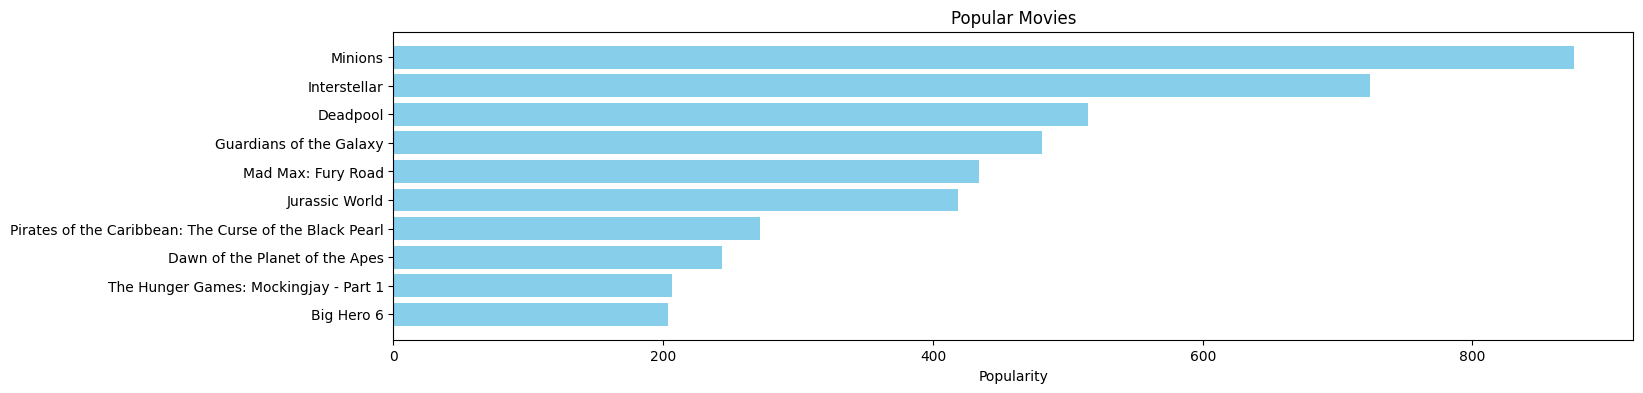

In [204]:
pop= df.sort_values('popularity', ascending=False)

plt.figure(figsize=(16,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [205]:
tfidf = TfidfVectorizer(stop_words='english')

df['keywords'] = df['keywords'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['keywords'])

tfidf_matrix.shape

(4803, 7069)

In [206]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [207]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [208]:

def get_recommendations(title, cosine_sim=cosine_sim):

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))


    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)


    sim_scores = sim_scores[1:11]


    movie_indices = [i[0] for i in sim_scores]


    return df['title'].iloc[movie_indices]

In [209]:
get_recommendations('Avatar')

1354               Space Chimps
278          Planet of the Apes
239                     Gravity
2403                     Aliens
838                      Alien³
1951                 Space Dogs
373             Mission to Mars
47      Star Trek Into Darkness
4332             Silent Running
3730                      Cargo
Name: title, dtype: object

In [210]:
#Create a search with priority based on the keywords used in the data
df['keywords'][0]

'culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d'

In [211]:
tfidf = TfidfVectorizer(stop_words='english')
df['keywords'] = df['keywords'].fillna('')

keywords_matrix = tfidf.fit_transform(df['keywords'])

keywords_matrix.shape

#Dataset file
(4805, 8000)

(4805, 8000)

In [212]:
same_matrix = linear_kernel(keywords_matrix,keywords_matrix)


In [213]:
mapping = pd.Series(df.index,index = df['title'])
mapping

title
Avatar                                                                                       0
Pirates of the Caribbean: At World's End                                                     1
Spectre                                                                                      2
The Dark Knight Rises                                                                        3
John Carter                                                                                  4
Spider-Man 3                                                                                 5
Tangled                                                                                      6
Avengers: Age of Ultron                                                                      7
Harry Potter and the Half-Blood Prince                                                       8
Batman v Superman: Dawn of Justice                                                           9
Superman Returns                            

In [214]:
def recommend_keywords(df_input):
    df_index = mapping[df_input]
    #find movies with same keywords
    same_score = list(enumerate(same_matrix[df_index]))
    
    #sort from top rated to lower rated
    same_score = sorted(same_score, key=lambda x: x[1], reverse=True)
    
    #output a recommendation of 20
    same_score = same_score[1:20]
    
    df_indices = [i[0] for i in same_score]
    return (df['title'].iloc[df_indices])


In [215]:
#Type in a title of the movie you would like a recommendation for our system will then find the keywords from the film that have been made be reviewers and will place a recommendation of at least 20 films that are similar and begin from highly rated to lower rated
recommend_keywords('Harry Potter and the Half-Blood Prince')


276       Harry Potter and the Chamber of Secrets
114           Harry Potter and the Goblet of Fire
191      Harry Potter and the Prisoner of Azkaban
113     Harry Potter and the Order of the Phoenix
2544                       Not Another Teen Movie
937                Hansel & Gretel: Witch Hunters
3919                                Teen Wolf Too
197      Harry Potter and the Philosopher's Stone
2394                                       Wolves
3049                                    Sleepover
2880                             Charlie Bartlett
4179                                        Vaalu
3364                                      Warlock
2756                              Crazy/Beautiful
4483                      The Sisterhood of Night
331                                   Seventh Son
37                     Oz: The Great and Powerful
1481               Thunder and the House of Magic
486                         The Last Witch Hunter
Name: title, dtype: object

In [216]:
#From the first seach of our Avatar film we beign to use our training data set. In this training set we being to use sequals. In 
#the sequek data we have a clear understadning that the next recommended films shoudl stem from one of its later films In this 
#we use Harry Potter as a base trainingset to see if the algorithm will recommend a film of the same franchise.

In [217]:
#Type in a title of the movie you would like a recommendation for our system will then find the keywords from the film that have been made be reviewers and will place a recommendation of at least 20 films that are similar and begin from highly rated to lower rated
recommend_keywords('Harry Potter and the Half-Blood Prince')

276       Harry Potter and the Chamber of Secrets
114           Harry Potter and the Goblet of Fire
191      Harry Potter and the Prisoner of Azkaban
113     Harry Potter and the Order of the Phoenix
2544                       Not Another Teen Movie
937                Hansel & Gretel: Witch Hunters
3919                                Teen Wolf Too
197      Harry Potter and the Philosopher's Stone
2394                                       Wolves
3049                                    Sleepover
2880                             Charlie Bartlett
4179                                        Vaalu
3364                                      Warlock
2756                              Crazy/Beautiful
4483                      The Sisterhood of Night
331                                   Seventh Son
37                     Oz: The Great and Powerful
1481               Thunder and the House of Magic
486                         The Last Witch Hunter
Name: title, dtype: object

In [218]:
#With the success of the sequel training set we use the same idea; instead on a franchise. In this case we test the algorithm on the 
#marvel keyword. In this we get a result of various marvel films that spam over the course, and have the recomendation based on the films 
#popularity and similarity in review.

In [219]:
#Type in a title of the movie you would like a recommendation for our system will then find the keywords from the film that have been made be reviewers and will place a recommendation of at least 20 films that are similar and begin from highly rated to lower rated
recommend_keywords('The Avengers')

182                                Ant-Man
7                  Avengers: Age of Ultron
79                              Iron Man 2
85     Captain America: The Winter Soldier
26              Captain America: Civil War
126                   Thor: The Dark World
169     Captain America: The First Avenger
129                                   Thor
203                                     X2
511                                  X-Men
64                       X-Men: Apocalypse
68                                Iron Man
232                          The Wolverine
174                    The Incredible Hulk
94                 Guardians of the Galaxy
242                         Fantastic Four
122               X-Men Origins: Wolverine
788                               Deadpool
31                              Iron Man 3
Name: title, dtype: object

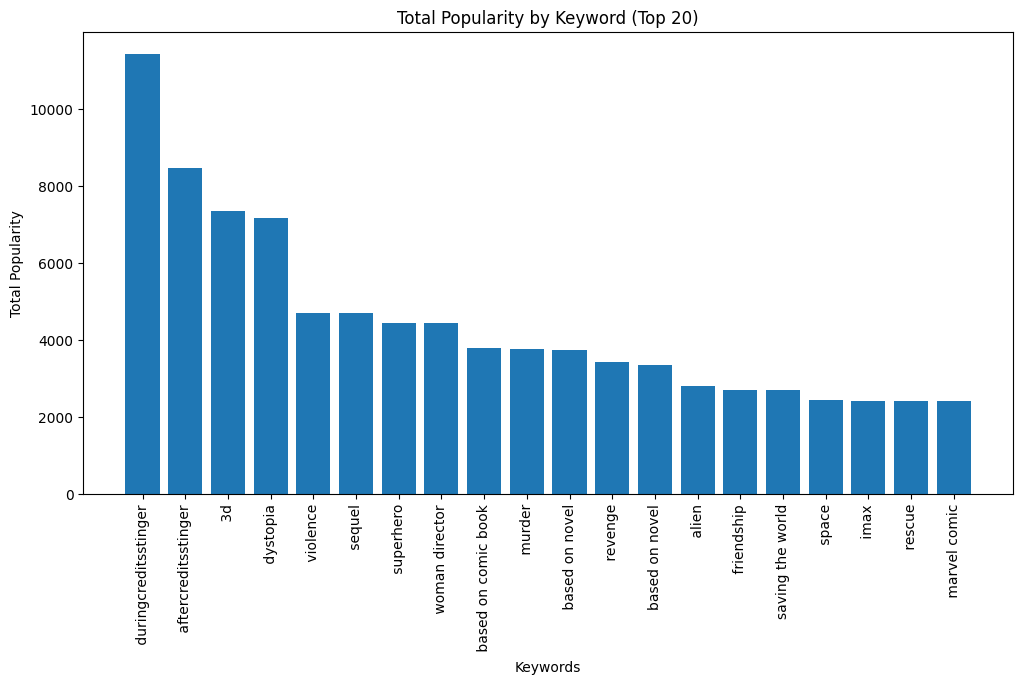

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the total popularity for each keyword
keywords_dict = {}
for i, row in df.iterrows():
    keywords = row['keywords'].split(',')
    popularity = row['popularity']
    for keyword in keywords:
        if keyword in keywords_dict:
            keywords_dict[keyword] += popularity
        else:
            keywords_dict[keyword] = popularity

# Sort keywords by popularity
sorted_keywords = sorted(keywords_dict, key=keywords_dict.get, reverse=True)

# Create a bar graph with the total popularity for the top 20 keywords
plt.figure(figsize=(12,6))
plt.bar(sorted_keywords[:20], [keywords_dict[k] for k in sorted_keywords[:20]])
plt.xticks(rotation=90)
plt.xlabel('Keywords')
plt.ylabel('Total Popularity')
#plt.bar('', '', color='green', width=0.4)
plt.title('Total Popularity by Keyword (Top 20)')
plt.show()

In [221]:
#In this graph we demonstrate the popularity and usage of keywords within our data. In the chart we list the 20 most common keyword use to describe each film.
#In the graph we can also see the popularity of each category and its prevelance. To best give the user an idea of the films that will most likely be recommended to the user.